### TSNE Activations of Pong Agents at Different Levels

In [9]:
import os
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import DBSCAN
%matplotlib notebook

In [34]:
vis_dir = '/home/rmrao/talisker/atari/breakout'
prefix = 'model-'
suffix = '.pkl'
files = os.listdir(vis_dir)
agents = sorted([int(file[len(prefix):-len(suffix)]) for file in files])

In [107]:
states = []
actions = []
# layer4 = []
clusters = []
layer5 = []
qvals = []
credit = []

for agent in agents:
    with open(os.path.join(vis_dir, prefix + str(agent) + suffix), 'rb') as f:
        data = pkl.load(f)
        states.append(data['states'])
        actions.append(data['actions'])
#         layer4.append(data['layer4'])
        
        if 'layer5_embed' in data:
            layer5.append(data['layer5_embed'])
        else:
            layer5.append(data['layer5'])
        cluster = DBSCAN(eps=1.3, min_samples=3).fit_predict(layer5[-1])
        clusters.append(cluster)
        qvals.append(data['qvals'])
        this_credit = data['qvals'].std(1)
        this_credit -= this_credit.min()
        this_credit /= this_credit.max()
        credit.append(this_credit)
        

#### Visualize TSNE of Activations for different agents

<IPython.core.display.Javascript object>


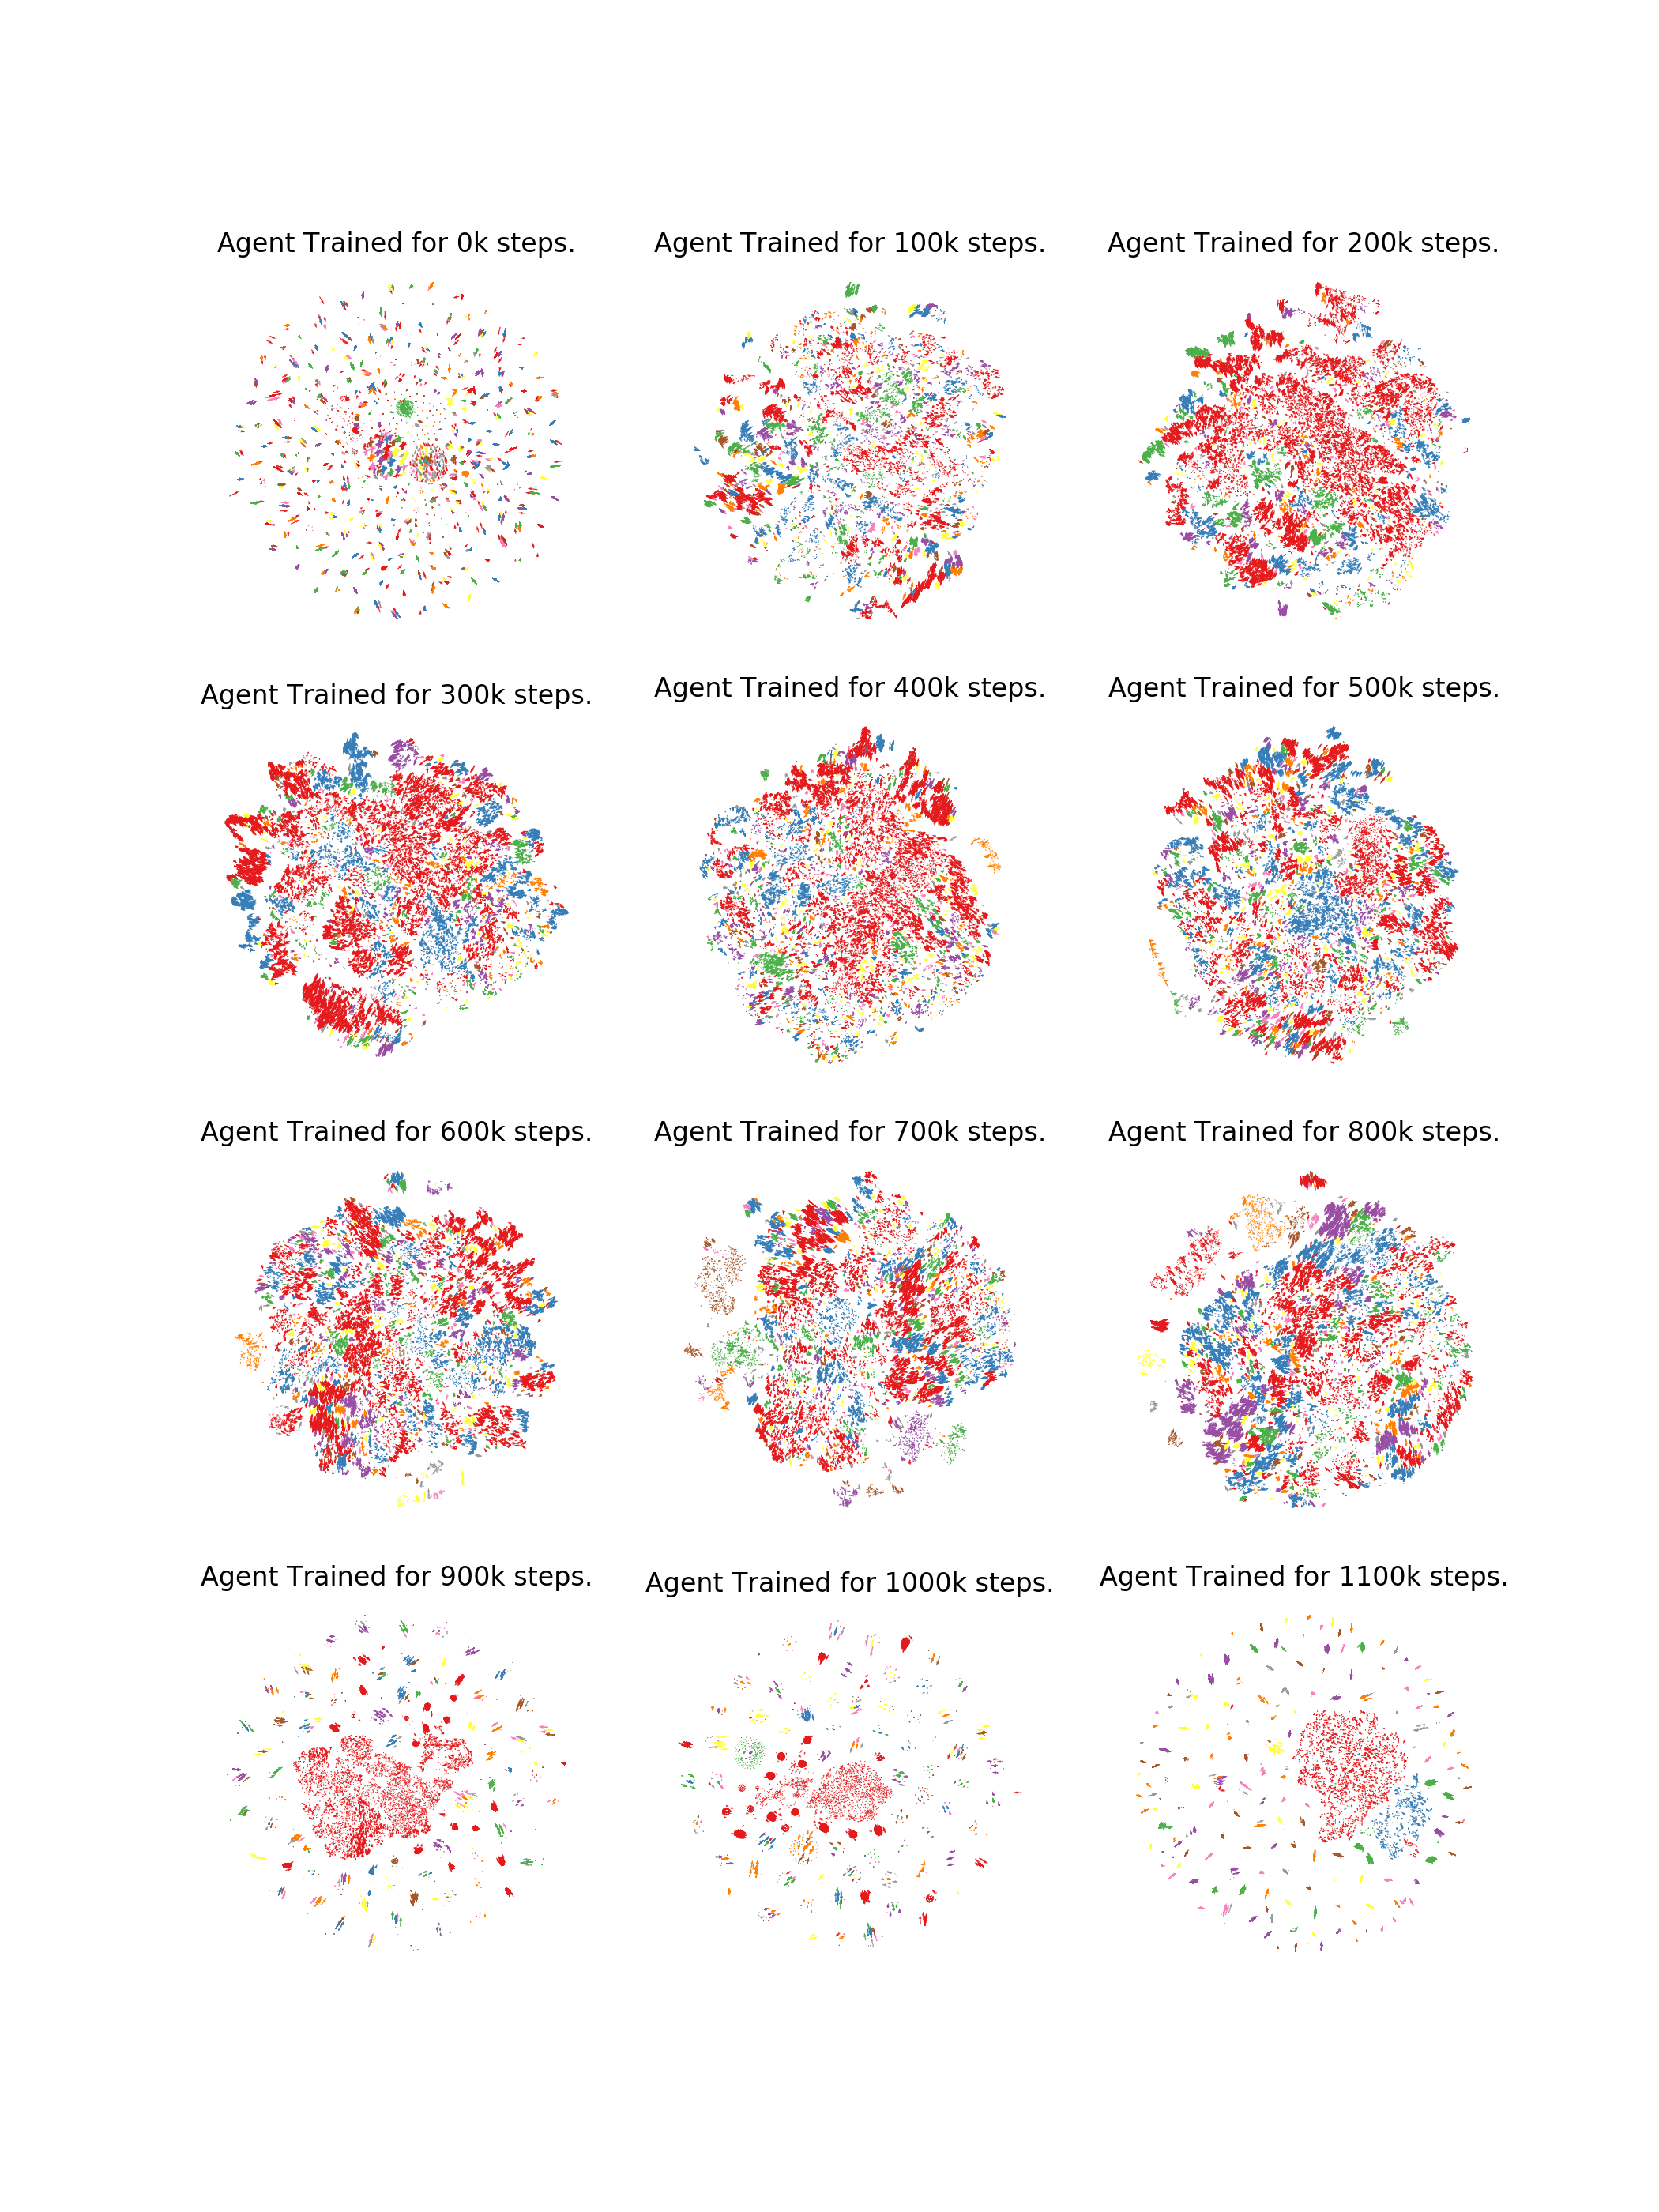

In [108]:
layer = 5
size=3.5
n_col = 3
n_row = 4
plt.figure(figsize=(n_col*size, n_row*size))
gs1 = gridspec.GridSpec(n_col*size, n_row*size)
gs1.update(wspace=0.05, hspace=0.05)
for i, agent in enumerate(agents):
    ax = plt.subplot(n_row, n_col, i + 1)
    filename = 'tsne_layer{}.npy'.format(layer)
    data = layer5[i]
#     plt.scatter(data[:,0], data[:,1], 0.3, c=credit[i], cmap='hot')
#     plt.scatter(data[:,0], data[:,1], 0.3, c=actions[i], cmap='Set1')
#     plt.scatter(data[:,0], data[:,1], 0.3, c=clusters[i], cmap='Set1')
    plt.quiver(data[:-1,0], data[:-1, 1], data[1:,0] - data[:-1, 0], data[1:,1] - data[:-1,1], clusters[i][:-1], angles='xy', scale_units='xy', scale=30, linewidths=1, cmap='Set1')
    plt.title('Agent Trained for {}k steps.'.format(int(agent / 1000)))
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.axis('off')
# What do exemplar states look like
# Why does agent at 0 steps look like that?
# Remove score from image
# New game -> tailor design, maybe inspired by Jacob Andreas's

<IPython.core.display.Javascript object>


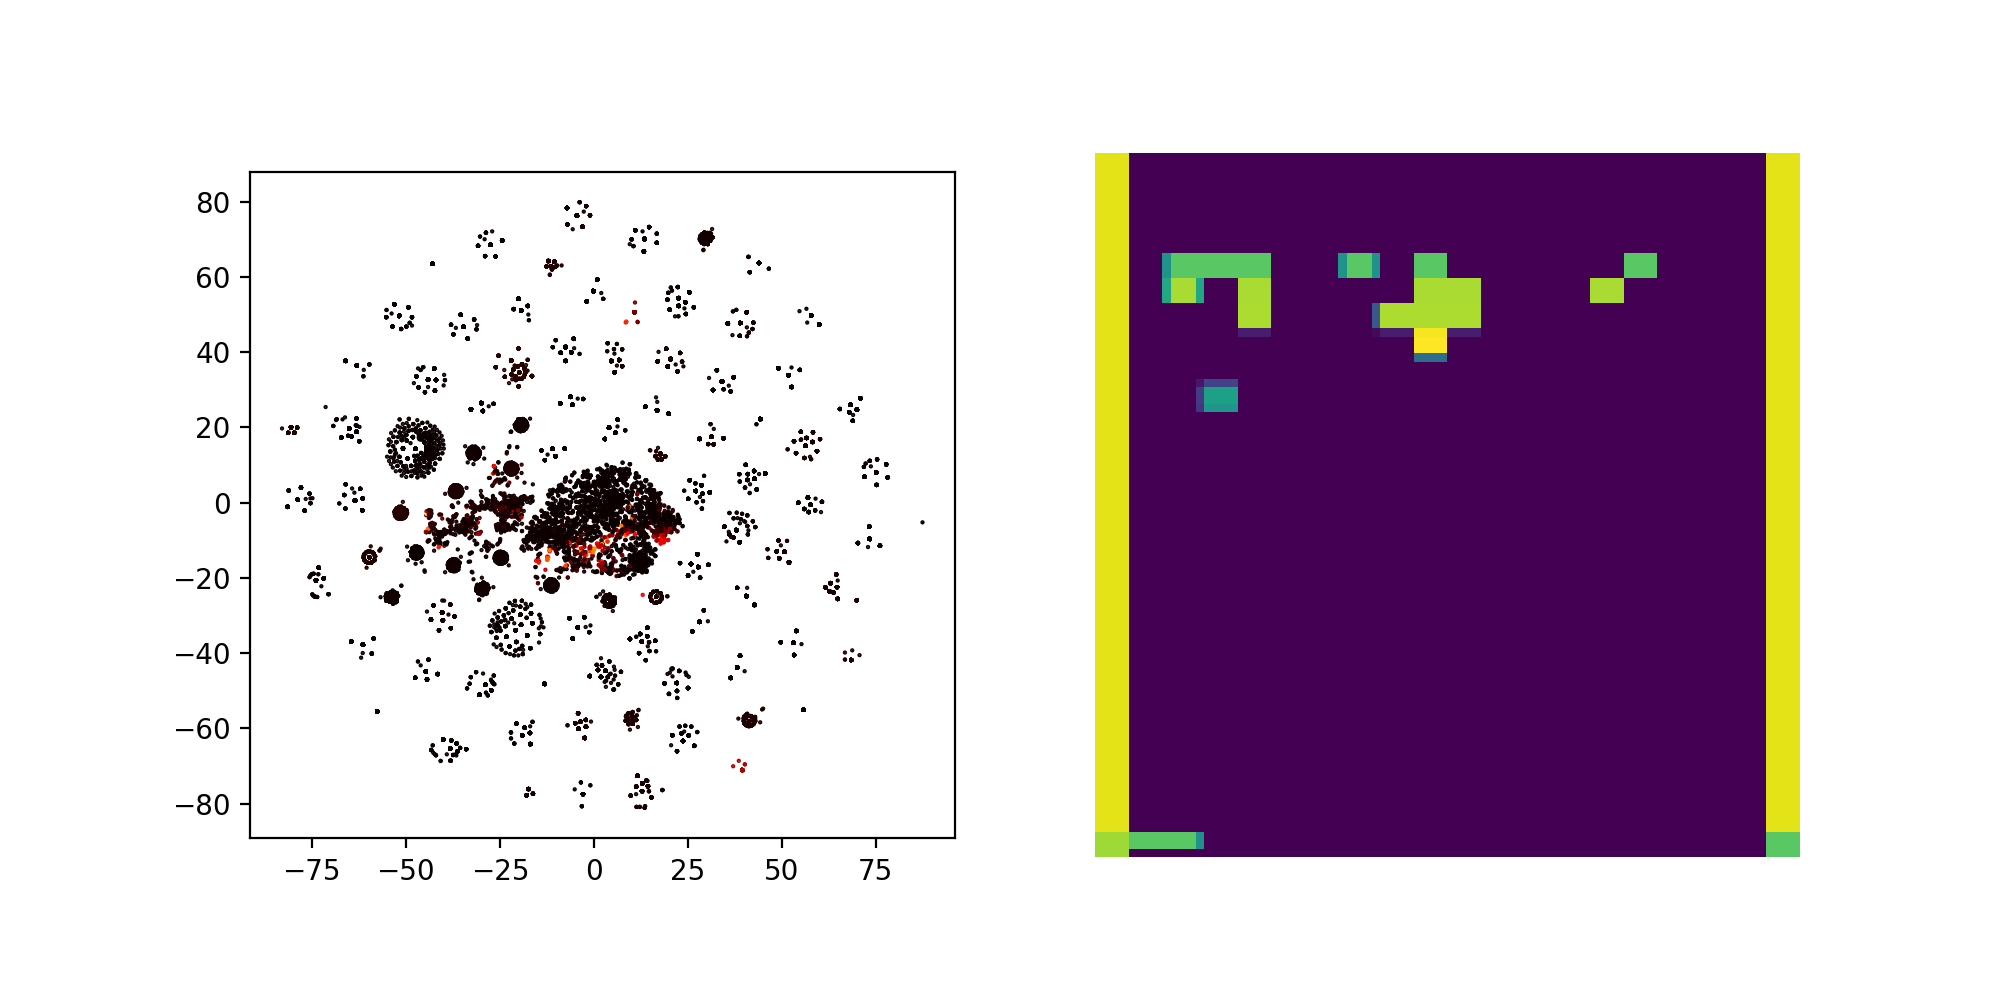

In [109]:
agent = 10
data = layer5[agent]
fig, ax = plt.subplots(figsize=(10, 5))
imgax = plt.subplot(1, 2, 2)
imgax.imshow(states[agent][0].reshape((84, 84)))
imgax.set_frame_on(False)
imgax.set_xticks([])
imgax.set_yticks([])
imgax.set_aspect('equal')
def onpick(event):
    ind = event.ind
    ind = ind[np.random.randint(len(ind))]
    imgax.imshow(states[agent][ind].reshape((84, 84)))
#     imgax.imshow(np.random.random((84, 84)))
datax = plt.subplot(1, 2, 1)
col = datax.scatter(data[:,0], data[:,1], 0.3, c=credit[agent], cmap='hot', picker=True)
# col = datax.scatter(data[:,0], data[:,1], 0.3, c=clusters[agent], cmap='Set1', picker=True)
datax.set_aspect('equal')
fig.canvas.mpl_connect('pick_event', onpick)
plt.show()


In [100]:
clusters = [DBSCAN(eps=1.3, min_samples=3).fit_predict(layer) for layer in layer5]